In [12]:
from classifier_model import ClassifierWithBoundingBox as Model
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load model
model = Model(101)

In [36]:
x = {0: 'accordion',
 1: 'airplanes',
 2: 'anchor',
 3: 'ant',
 4: 'barrel',
 5: 'bass',
 6: 'beaver',
 7: 'binocular',
 8: 'bonsai',
 9: 'brain',
 10: 'brontosaurus',
 11: 'buddha',
 12: 'butterfly',
 13: 'camera',
 14: 'cannon',
 15: 'car_side',
 16: 'ceiling_fan',
 17: 'cellphone',
 18: 'chair',
 19: 'chandelier',
 20: 'cougar_body',
 21: 'cougar_face',
 22: 'crab',
 23: 'crayfish',
 24: 'crocodile',
 25: 'crocodile_head',
 26: 'cup',
 27: 'dalmatian',
 28: 'dollar_bill',
 29: 'dolphin',
 30: 'dragonfly',
 31: 'electric_guitar',
 32: 'elephant',
 33: 'emu',
 34: 'euphonium',
 35: 'ewer',
 36: 'Faces',
 37: 'Faces_easy',
 38: 'ferry',
 39: 'flamingo',
 40: 'flamingo_head',
 41: 'garfield',
 42: 'gerenuk',
 43: 'gramophone',
 44: 'grand_piano',
 45: 'hawksbill',
 46: 'headphone',
 47: 'hedgehog',
 48: 'helicopter',
 49: 'ibis',
 50: 'inline_skate',
 51: 'joshua_tree',
 52: 'kangaroo',
 53: 'ketch',
 54: 'lamp',
 55: 'laptop',
 56: 'Leopards',
 57: 'llama',
 58: 'lobster',
 59: 'lotus',
 60: 'mandolin',
 61: 'mayfly',
 62: 'menorah',
 63: 'metronome',
 64: 'minaret',
 65: 'Motorbikes',
 66: 'nautilus',
 67: 'octopus',
 68: 'okapi',
 69: 'pagoda',
 70: 'panda',
 71: 'pigeon',
 72: 'pizza',
 73: 'platypus',
 74: 'pyramid',
 75: 'revolver',
 76: 'rhino',
 77: 'rooster',
 78: 'saxophone',
 79: 'schooner',
 80: 'scissors',
 81: 'scorpion',
 82: 'sea_horse',
 83: 'snoopy',
 84: 'soccer_ball',
 85: 'stapler',
 86: 'starfish',
 87: 'stegosaurus',
 88: 'stop_sign',
 89: 'strawberry',
 90: 'sunflower',
 91: 'tick',
 92: 'trilobite',
 93: 'umbrella',
 94: 'watch',
 95: 'water_lilly',
 96: 'wheelchair',
 97: 'wild_cat',
 98: 'windsor_chair',
 99: 'wrench',
 100: 'yin_yang'}

In [9]:
model.load_state_dict(torch.load('image_classification_with_bounding_boxes.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

In [132]:
def make_pred(image):
    model.eval()

    with torch.inference_mode():
        features, predicted_bboxes = model(torch.stack([image]))
        pred_prob = torch.softmax(features.squeeze(), dim=0)
        pred_class = pred_prob.argmax().cpu()
        pred_box = predicted_bboxes.cpu()

    return pred_box, pred_class

In [133]:
from torchvision import transforms

size_dim = (256, 256)
# Set up transforms
transform = transforms.Compose([
    transforms.Resize(size_dim),
    transforms.ToTensor(),
])

In [153]:
image_path = "dataset/buddha/image_0011.jpg"

In [154]:
img = Image.open(image_path)

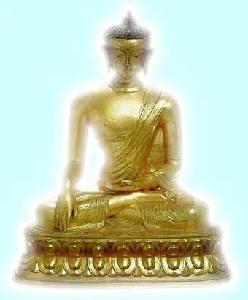

In [155]:
img

In [156]:
image = transform(img)

In [157]:
bbox, predicted = make_pred(image)

In [158]:
bbox, predicted

(tensor([[  6.8487, 240.3299,  15.5195, 224.4385]]), tensor(11))

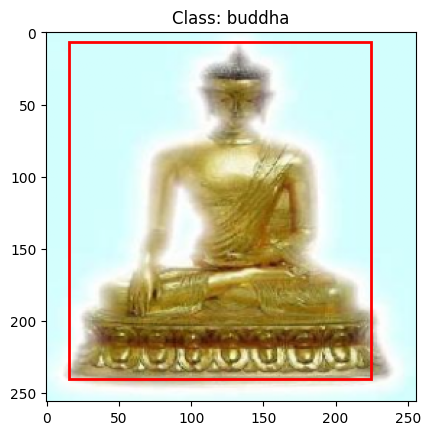

In [159]:

from matplotlib import patches


fig, ax = plt.subplots(1)

image_np = np.transpose(image.numpy(), (1, 2, 0))
# image_np = img.T


ax.imshow(image_np)
y1, y2, x1, x2 = bbox.detach().numpy().T
w = x2-x1
h = y2-y1
rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                         edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.title(f'Class: {x[predicted.item()]}')
plt.show()